# 07MAIR - Redes Neuronales y Deep Learning
## VC04_V05: Deep Learning y Deep vision

In [1]:
# Funciones base

import matplotlib.pyplot as plt
import numpy as np

def visualize_learning_curve(H):
  epochs = len(H.history["loss"])
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

from sklearn.metrics import classification_report

def evaluate_model(model, x, y):
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(x, batch_size=128)
  print(classification_report(y, predictions.argmax(axis=1)))

## **INTRODUCCIÓN A LAS CONVOLUTIONAL NEURAL NETWORKS: MNIST DATASET**

#### **- Cargando el conjunto de datos**

In [2]:
# Cargar dataset de mnist
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### **- Acondicionando el conjunto de datos**

In [3]:
# Pre-procesado obligatorio cuando trabajo con redes neuronales
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.backend import expand_dims

# Normalización de los datos
x_train_norm, x_test_norm = x_train / 255, x_test / 255

# Partición de los datos
x_train_tr, x_train_val, y_train_tr, y_train_val = train_test_split(
    x_train_norm, y_train, test_size=0.15, random_state=42)

# Adecuar dimensión para su procesamiento en formato tensor imagen
x_tr = np.expand_dims(x_train_tr, axis=-1)
x_val = np.expand_dims(x_train_val, axis=-1)
x_test = np.expand_dims(x_test_norm, axis=-1)

print(x_tr.shape)
print(x_val.shape)
print(x_test.shape)

(51000, 28, 28, 1)
(9000, 28, 28, 1)
(10000, 28, 28, 1)


#### **- Creando la topología de Red Neuronal (CNN) y entrenándola**

In [4]:
# Construccion de una red CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Red feedforward API secuencial
convnet = Sequential()

# BASE MODEL
## BM Bloque 1
convnet.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                          input_shape=(x_tr.shape[1], x_tr.shape[2], 1)))
convnet.add(layers.MaxPooling2D((2, 2)))

## BM Bloque 2
convnet.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
convnet.add(layers.MaxPooling2D((2, 2)))

## BM Bloque 3
convnet.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
convnet.add(layers.MaxPooling2D((2, 2)))

# TOP MODEL
convnet.add(layers.Flatten())
convnet.add(layers.Dense(64, activation='relu'))
convnet.add(layers.Dense(10, activation='softmax'))

convnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [5]:
from tensorflow.keras.optimizers import Adam

# Losses para multi-clax softmax (Particular de Keras y Tensorflow)
# Sparse -> 5 -> sparse_categorical_crossentropy
# OHE -> [0, 0, 0, 0, 1, 0, ...] -> categorical_crossentropy

# Compilación
lr = 0.001
convnet.compile(optimizer=Adam(learning_rate=lr),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [6]:
# Entrenamiento
print("[INFO] Entrenando Red Neuronal...")
H = convnet.fit(x_tr, y_train_tr,
                epochs=5, batch_size=16,
                validation_data=(x_val, y_train_val))

[INFO] Entrenando Red Neuronal...
Epoch 1/5
3188/3188 [==============================] - 13s 3ms/step - loss: 0.1302 - accuracy: 0.9586 - val_loss: 0.0524 - val_accuracy: 0.9834
Epoch 2/5
3188/3188 [==============================] - 9s 3ms/step - loss: 0.0464 - accuracy: 0.9856 - val_loss: 0.0778 - val_accuracy: 0.9749
Epoch 3/5
3188/3188 [==============================] - 9s 3ms/step - loss: 0.0340 - accuracy: 0.9890 - val_loss: 0.0462 - val_accuracy: 0.9876
Epoch 4/5
3188/3188 [==============================] - 9s 3ms/step - loss: 0.0235 - accuracy: 0.9927 - val_loss: 0.0346 - val_accuracy: 0.9911
Epoch 5/5
3188/3188 [==============================] - 9s 3ms/step - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.0502 - val_accuracy: 0.9874


#### **- Observando el proceso de entrenamiento para tomar decisiones**

[INFO]: Evaluando red neuronal...
79/79 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



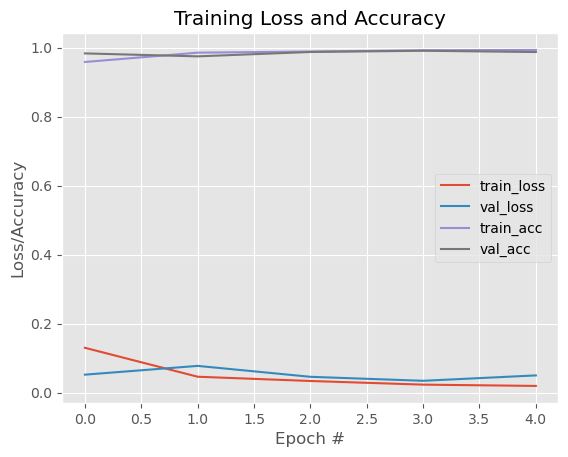

In [7]:
# Evaluación + Testeo

# Learning curves
visualize_learning_curve(H=H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(convnet, x_test, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 64)        

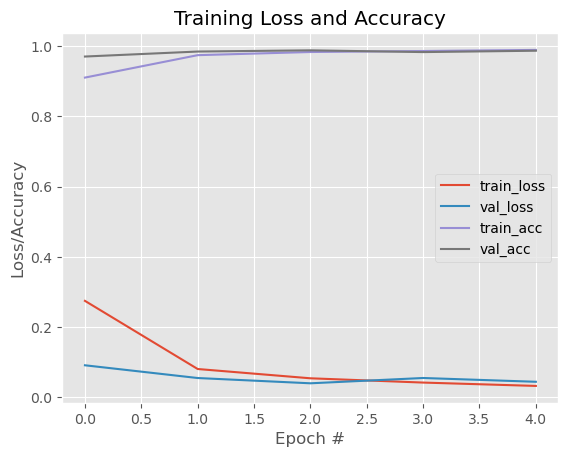

In [8]:
# Red Neuronal con menos parámetros (global_average_pooling)

# Red feedforward API secuencial
convnet = Sequential()

# BASE MODEL
## BM Bloque 1
convnet.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                          input_shape=(x_tr.shape[1], x_tr.shape[2], 1)))
convnet.add(layers.MaxPooling2D((2, 2)))

## BM Bloque 2
convnet.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
convnet.add(layers.MaxPooling2D((2, 2)))

## BM Bloque 3
convnet.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
convnet.add(layers.MaxPooling2D((2, 2)))

# TOP MODEL
convnet.add(layers.GlobalAvgPool2D())
convnet.add(layers.Dense(64, activation='relu'))
convnet.add(layers.Dense(10, activation='softmax'))

convnet.summary()

# Compilación
lr = 0.001
convnet.compile(optimizer=Adam(learning_rate=lr),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamiento
print("[INFO] Entrenando Red Neuronal...")
H = convnet.fit(x_tr, y_train_tr,
                epochs=5, batch_size=16,
                validation_data=(x_val, y_train_val))

# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(convnet, x_test, y_test)

## **¿POR QUE CONVOLUTIONAL NEURAL NETWORKS?: CIFAR DATASET**

#### **- Cargando el conjunto de datos y acondicionándolo**

In [9]:
# Importando el set de datos CIFAR10
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

labelNames = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo', 'Perro',
              'Rana', 'Caballo', 'Barco', 'Camión']

print("[INFO] Loading CIFAR10 data...")
((x_train, y_train), (x_test, y_test)) = cifar10.load_data()

# Normalización en intensidad de las imágenes
x_tr_norm, x_te_norm = x_train.astype("float32") / 255, x_test.astype("float32") / 255

# Partición de los datos: train/val/test
x_train_tr, x_train_val, y_train_tr, y_train_val = train_test_split(
    x_tr_norm, y_train, test_size=0.15, random_state=42
)

# Dimensiones
print(x_train_tr.shape)
print(y_train_tr.shape)
print(x_train_val.shape)
print(y_train_val.shape)
print(x_te_norm.shape)
print(y_test.shape)

[INFO] Loading CIFAR10 data...
(42500, 32, 32, 3)
(42500, 1)
(7500, 32, 32, 3)
(7500, 1)
(10000, 32, 32, 3)
(10000, 1)


#### **- Inspeccionando el conjunto de datos**

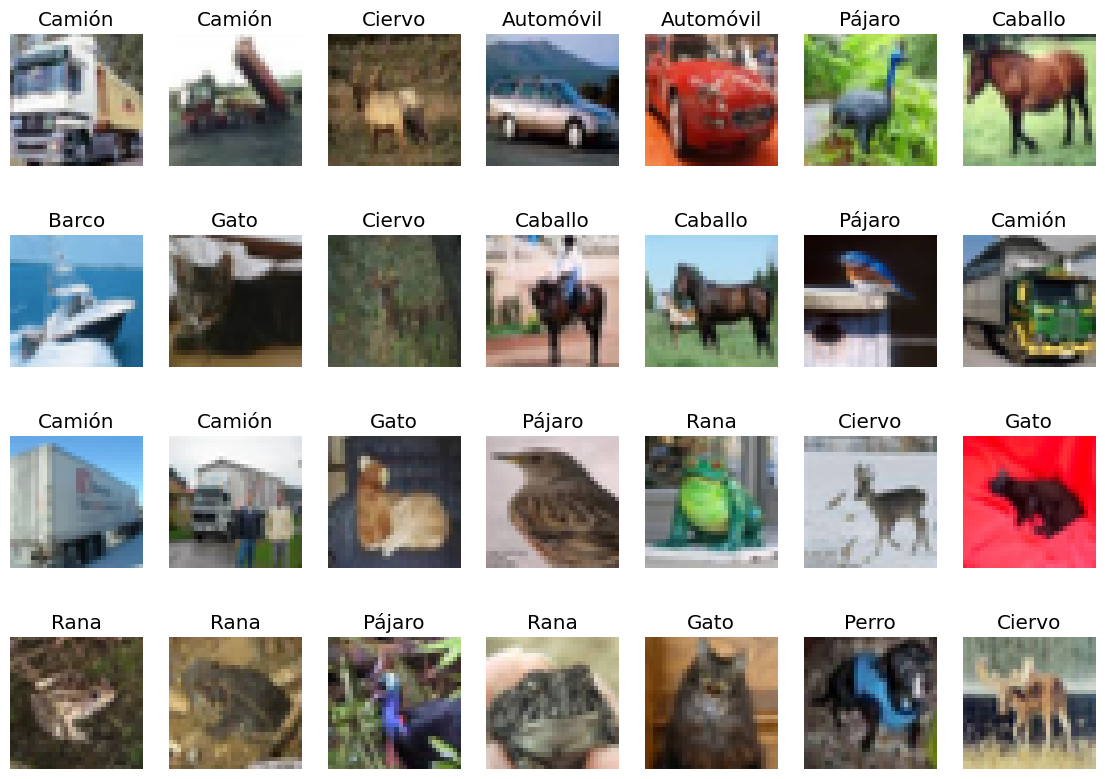

In [10]:
# Inspección del conjunto de datos
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = x_train[n]
    plt.imshow(img)
    plt.title(labelNames[y_train[n][0]])
    plt.axis('off')


#### **- Creando la topología de red neuronal y entrenándola: MLP**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Arquitectura de red - modo API Sequential
mlp = Sequential()
mlp.add(Flatten(input_shape=(32, 32, 3)))
mlp.add(Dense(1024, activation='relu'))
mlp.add(Dropout(0.25))
mlp.add(Dense(512, activation='relu'))
mlp.add(Dropout(0.25))
mlp.add(Dense(10, activation='softmax'))

# Compilamos el modelo y entrenamos
mlp.compile(optimizer=Adam(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
mlp.summary()

# Entrenamos el perceptrón multicapa
print("\n\n[INFO] Entrenando Red Neuronal...")
H = mlp.fit(x_train_tr, y_train_tr, epochs=100, batch_size=128,
            validation_data=(x_train_val, y_train_val))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              3146752   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
No

[INFO]: Evaluando red neuronal...
79/79 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.51      0.59      0.55      1000
           1       0.65      0.55      0.59      1000
           2       0.44      0.26      0.33      1000
           3       0.35      0.38      0.36      1000
           4       0.38      0.54      0.44      1000
           5       0.55      0.23      0.33      1000
           6       0.48      0.63      0.55      1000
           7       0.61      0.55      0.58      1000
           8       0.58      0.66      0.62      1000
           9       0.53      0.59      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.49     10000
weighted avg       0.51      0.50      0.49     10000



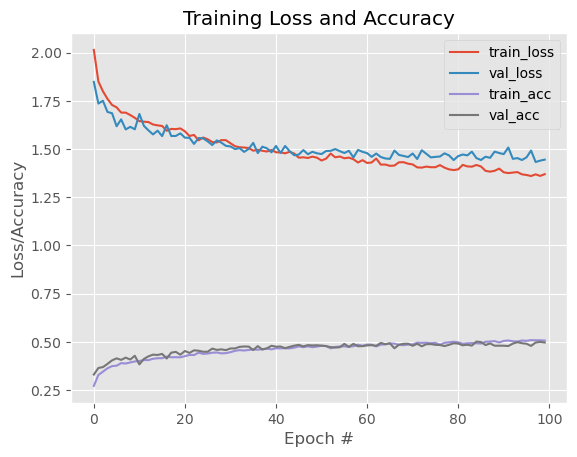

In [12]:
# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(mlp, x_te_norm, y_test)

#### **- Creando la topología de red neuronal y entrenándola: CNN**

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0     

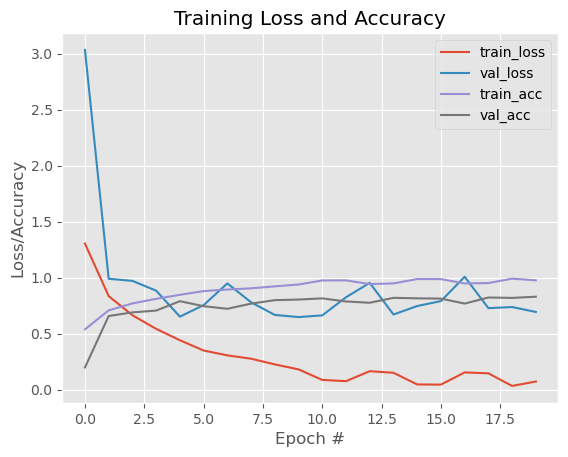

In [13]:
# Arquitectura de red - modo API Functional
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

# Definimos layer de entrada
input = layers.Input(shape=(x_train_tr.shape[1], x_train_tr.shape[2], x_train_tr.shape[3]))

# 1.BASE MODEL

# Bloque 1
x1 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(input)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.MaxPooling2D(pool_size=(2, 2))(x1)

# Bloque 2
x2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x2)
x2 = layers.BatchNormalization()(x2)
x2 = layers.MaxPooling2D(pool_size=(2, 2))(x2)

# Bloque 3
x3 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x2)
x3 = layers.BatchNormalization()(x3)
x3 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x3)
x3 = layers.BatchNormalization()(x3)
x3 = layers.MaxPooling2D(pool_size=(2, 2))(x3)

# Bloque 4
x4 = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x2)
x4 = layers.BatchNormalization()(x4)
x4 = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x4)
x4 = layers.BatchNormalization()(x4)
x4 = layers.MaxPooling2D(pool_size=(2, 2))(x4)

# 2.TOP MODEL
gap = layers.GlobalAvgPool2D()(x4)
gap = layers.Dropout(0.25)(gap)
predictions = layers.Dense(10, activation='softmax')(gap)

# 3. Unimos las entradas y salidas del modelo
convnet = Model(inputs=input, outputs=predictions)
convnet.summary()

# Compilamos el modelo y entrenamos
convnet.compile(optimizer=Adam(learning_rate=0.001),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

# Entrenamos el perceptrón multicapa
print("\n\n[INFO] Entrenando Red Neuronal...")
H = convnet.fit(x_train_tr, y_train_tr, batch_size=128, epochs=20,
                validation_data=(x_train_val, y_train_val))

# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(convnet, x_te_norm, y_test)

## **REDUCIENDO OVERFITTING MEDIANTE DATA AUGMENTATION**

#### **- Acondicionando dataset**

In [14]:
# Binarizar etiquetas - por si es necesario convertir a one-hot encoding
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_tr_ohe = lb.fit_transform(y_train_tr)
y_train_val_ohe = lb.fit_transform(y_train_val)
y_test_ohe = lb.fit_transform(y_test)

# Dimensiones
print(y_train_tr_ohe.shape)
print(y_train_val_ohe.shape)
print(y_test_ohe.shape)

(42500, 10)
(7500, 10)
(10000, 10)


#### **- Creando un contenedor DataGenerator para el aumento automático de muestras**

In [27]:
# Crear Image DataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(
    rescale=1./1.,      # Ya se ha hecho la normalización. Si quieres normalizar con rescale -> rescale=1./255
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2
)

datagen_val = ImageDataGenerator(
    rescale=1./1.
)

#### **- Inspeccionando las muestras generadas sintéticamente**

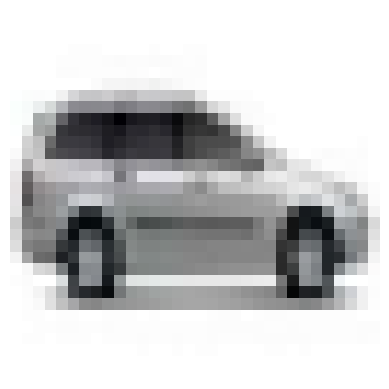

Label = Automóvil


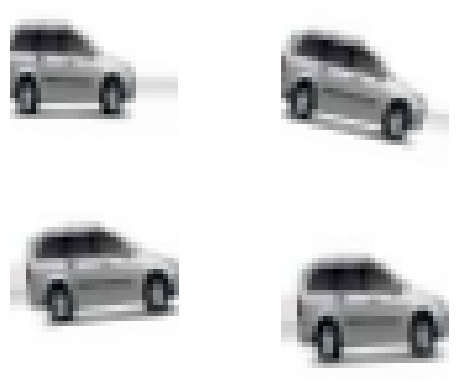

In [28]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

sample = 15
plt.imshow(image.array_to_img(x_train_tr[sample]))
plt.axis("off")
plt.show()
print('Label = {}'.format(labelNames[y_train_tr_ohe[sample].argmax(axis=0)]))

fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen_train.flow(x_train_tr[sample].reshape((1,32,32,3)),batch_size=1):
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    axes[i//2,i%2].axis("off")
    i += 1
    if i == 4:
        break
plt.show()

#### **- Creando la topología de red neuronal y entrenándola: CNN**

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_24 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_25 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0   

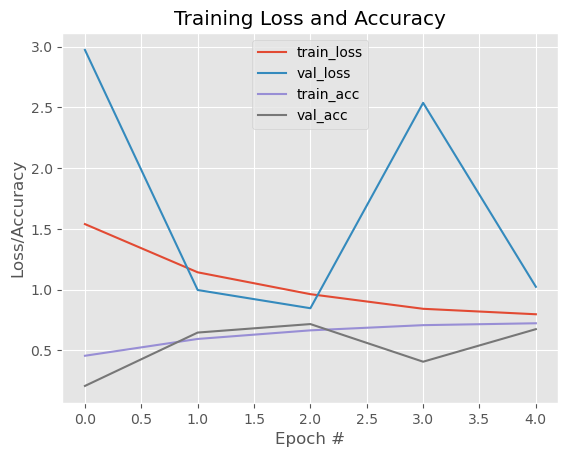

In [30]:
# Arquitectura de red - modo API Functional
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

# Hiperparámetros
epochs = 5
batch_size = 128

# Definimos layer de entrada
input = layers.Input(shape=(x_train_tr.shape[1], x_train_tr.shape[2], x_train_tr.shape[3]))

# 1.BASE MODEL

# Bloque 1
x1 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(input)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.MaxPooling2D(pool_size=(2, 2))(x1)

# Bloque 2
x2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x2)
x2 = layers.BatchNormalization()(x2)
x2 = layers.MaxPooling2D(pool_size=(2, 2))(x2)

# Bloque 3
x3 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x2)
x3 = layers.BatchNormalization()(x3)
x3 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x3)
x3 = layers.BatchNormalization()(x3)
x3 = layers.MaxPooling2D(pool_size=(2, 2))(x3)

# Bloque 4
x4 = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x2)
x4 = layers.BatchNormalization()(x4)
x4 = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x4)
x4 = layers.BatchNormalization()(x4)
x4 = layers.MaxPooling2D(pool_size=(2, 2))(x4)

# 2.TOP MODEL
gap = layers.GlobalAvgPool2D()(x4)
gap = layers.Dropout(0.25)(gap)
predictions = layers.Dense(10, activation='softmax')(gap)

# 3. Unimos las entradas y salidas del modelo
convnet = Model(inputs=input, outputs=predictions)
convnet.summary()

# Compilamos el modelo y entrenamos
convnet.compile(optimizer=Adam(learning_rate=0.001),
                loss="categorical_crossentropy",       # Ahora se trabaja con OHE, por lo que cambiamos la función de pérdidas
                metrics=['accuracy'])

# Entrenamos el perceptrón multicapa
print("\n\n[INFO] Entrenando Red Neuronal...")
H = convnet.fit(datagen_train.flow(x_train_tr, y_train_tr_ohe, batch_size=batch_size),
                epochs=epochs, steps_per_epoch=x_train_tr.shape[0] // batch_size,
                validation_data=datagen_val.flow(x_train_val, y_train_val_ohe, batch_size=batch_size))

# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(convnet, x_te_norm, y_test)

# WARNING CON IMAGEDATA GENERATORS!!!
# Cuando hacemos:
# model.predict(datagen_val.flow(x_te_norm, y_test, batch_size=32, shuffle=False)) -> predicciones de test (probabilidades)
# Si utilizamos el datagenerator para test es importante poner shuffle a False (ya que por defecto está a True), 
# para luego sacar las métricas. En el caso de tener activado shuffle se perdería la concordancia entre predicciones y gt.


In [32]:
## Callbacks
from tensorflow import keras

callback = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3,
                                         restore_best_weights=True,
                                         verbose=1)

# Entrenamos el perceptrón multicapa
print("\n\n[INFO] Entrenando Red Neuronal...")
H = convnet.fit(x_train_tr, y_train_tr_ohe, batch_size=128, epochs=20,
                validation_data=(x_train_val, y_train_val_ohe),
                callbacks=[callback])



[INFO] Entrenando Red Neuronal...
Epoch 1/20
333/333 [==============================] - 5s 15ms/step - loss: 0.5218 - accuracy: 0.8195 - val_loss: 0.6182 - val_accuracy: 0.7856
Epoch 2/20
333/333 [==============================] - 5s 15ms/step - loss: 0.4233 - accuracy: 0.8550 - val_loss: 0.6168 - val_accuracy: 0.7879
Epoch 3/20
333/333 [==============================] - 5s 15ms/step - loss: 0.3259 - accuracy: 0.8867 - val_loss: 0.7049 - val_accuracy: 0.7763
Epoch 4/20
333/333 [==============================] - 5s 15ms/step - loss: 0.2515 - accuracy: 0.9138 - val_loss: 0.5339 - val_accuracy: 0.8209
Epoch 5/20
333/333 [==============================] - 5s 15ms/step - loss: 0.2011 - accuracy: 0.9308 - val_loss: 0.7097 - val_accuracy: 0.7837
Epoch 6/20
333/333 [==============================] - 5s 15ms/step - loss: 0.1679 - accuracy: 0.9432 - val_loss: 0.6279 - val_accuracy: 0.8148
Epoch 7/20
333/333 [==============================] - 5s 15ms/step - loss: 0.1802 - accuracy: 0.9371 - val

**EJERCICIO PROPUESTO:** Modificar la ejecución con Data Augmentation para que sea directamente comparable a la ejecución por defecto. Para ello, el validation data debe ser correcto. Pista: Llevar a cabo el validation split cuando se instancia el objeto ImageDataGenerator. El método flow también se verá afectado (leer documentación).

## **TRABAJANDO CON REDES PRE-ENTRENADAS: TRANSFER LEARNING & FINE-TUNING**


#### **- Cargando el conjunto de datos y acondicionándolo como en la VGG**

In [18]:
# Imports necesarios

# Importando y normalizando el set de datos CIFAR10

# One-hot encoding

# IMPORTANTE: Se normalizan los datos como se normalizaron en el entrenamiento con ImageNet!!


#### **- Cargando la topología de CNN (base model)**

In [33]:
# keras incluye varias arquitecturas
# VGG16, VGG19, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, RasNet
# documentacion https://keras.io/applications/
# Visual Geometry Group 16 / 19 (numero de layers)
# 1 y 2 en la competicion ImageNet 2014
# Kernels pequeños de 3x3

# Cargar arquitectura y pesos
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights="imagenet", include_top=False,
                   input_shape=(32, 32, 3))

base_model.summary()


58889256/58889256 [==============================] - 19s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                             

#### **- Creando el top model y congelando TODAS las capas convolucionales (TRANSFER LEARNING)**

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# En general, conforme aumente la diferencia entre el entrenamiento del modelo pre-entrenado y la aplicación que le quieres dar,
# utilizaremos Finetuning (entrenamiento de los parámetros de la red pre-entrenada). Cuanto más se parezca la aplicación que
# queremos dar con el modelo pre-entrenado, tenderemos a hacer Transfer Learning (no se entrenan los parámetros de la red).

# No entrenamos el base model
base_model.trainable = False

# Conectar el modelo con el top model
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(Flatten())
pre_trained_model.add(Dense(10, activation='softmax'))

pre_trained_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
_________________________________________________________________


#### **- Entrenando la solución**

In [38]:
# Import the necessary packages

# Compilamos el modelo y entrenamos
pre_trained_model.compile(optimizer=Adam(learning_rate=0.001),
                loss="categorical_crossentropy",
                metrics=['accuracy'])

# Entrenamos el perceptrón multicapa
print("\n\n[INFO] Entrenando Red Neuronal...")
H = pre_trained_model.fit(datagen_train.flow(x_train_tr, y_train_tr_ohe, batch_size=batch_size),
                epochs=epochs, steps_per_epoch=x_train_tr.shape[0] // batch_size,
                validation_data=datagen_val.flow(x_train_val, y_train_val_ohe, batch_size=batch_size))



[INFO] Entrenando Red Neuronal...
Epoch 1/5
332/332 [==============================] - 18s 52ms/step - loss: 1.4733 - accuracy: 0.4878 - val_loss: 1.3545 - val_accuracy: 0.5271
Epoch 2/5
332/332 [==============================] - 17s 51ms/step - loss: 1.4582 - accuracy: 0.4963 - val_loss: 1.3382 - val_accuracy: 0.5323
Epoch 3/5
332/332 [==============================] - 17s 51ms/step - loss: 1.4423 - accuracy: 0.5010 - val_loss: 1.3235 - val_accuracy: 0.5396
Epoch 4/5
332/332 [==============================] - 17s 51ms/step - loss: 1.4386 - accuracy: 0.5007 - val_loss: 1.3206 - val_accuracy: 0.5393
Epoch 5/5
332/332 [==============================] - 17s 51ms/step - loss: 1.4323 - accuracy: 0.5053 - val_loss: 1.3119 - val_accuracy: 0.5380


[INFO]: Evaluando red neuronal...
79/79 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1000
           1       0.53      0.66      0.59      1000
           2       0.57      0.30      0.40      1000
           3       0.45      0.33      0.38      1000
           4       0.58      0.43      0.49      1000
           5       0.55      0.49      0.52      1000
           6       0.43      0.79      0.56      1000
           7       0.59      0.62      0.60      1000
           8       0.76      0.57      0.65      1000
           9       0.51      0.61      0.56      1000

    accuracy                           0.54     10000
   macro avg       0.56      0.54      0.54     10000
weighted avg       0.56      0.54      0.54     10000



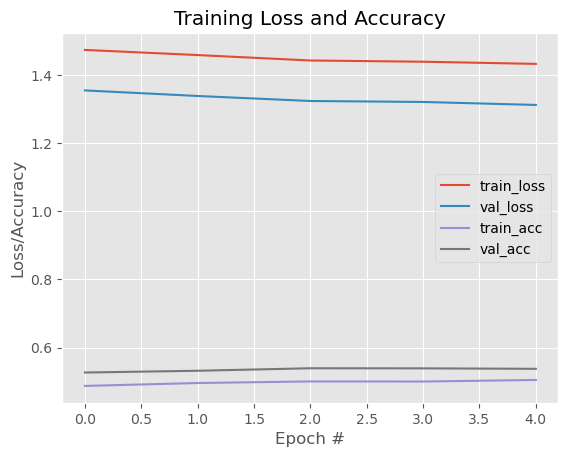

In [39]:
# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(pre_trained_model, x_te_norm, y_test)

#### **- Creando el top model y descongelando bloques convolucionales (FINE TUNING)**

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

c:\Users\pepel\.conda\envs\PySpace310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pepel\.conda\envs\PySpace310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pepel\.conda\envs\PySpace310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


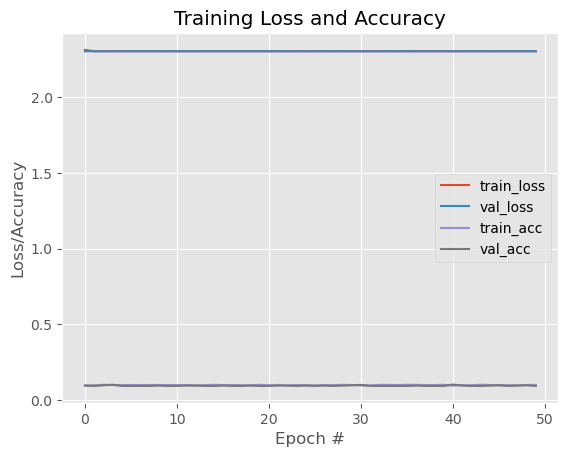

In [42]:
# Imports que vamos a necesitar
from tensorflow.keras.applications import VGG16

# Definición de hiperparámetros
batch_size = 128
learning_rate = 0.001
epochs = 50
num_classes = 10

# Cargar arquitectura y pesos
base_model = VGG16(weights="imagenet",
                   include_top=False,
                   input_shape=(32, 32, 3))
base_model.summary()

# Congelamos parcialmente
first_trained_layer = "block3_conv1"    # "block3_conv1" / "block4_conv1" / "block5_conv1"
for layer in base_model.layers:
    if layer.name == first_trained_layer:
        break
    layer.trainable = False
    print("Capa" + layer.name + "congelada...")

# Conectar el modelo con top model
ft_model = Sequential()
ft_model.add(base_model)
ft_model.add(layers.Flatten())
ft_model.add(Dense(256, activation='relu'))
ft_model.add(Dense(10, activation='softmax'))

ft_model.summary()

# Compilamos el modelo y entrenamos
ft_model.compile(optimizer=Adam(learning_rate=learning_rate),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

print("\n\n[INFO] Entrenando Red Neuronal...")
H = ft_model.fit(x_train_tr, y_train_tr, batch_size=batch_size,
                 epochs=epochs, steps_per_epoch=x_train_tr.shape[0] // batch_size,
                 validation_data=(x_train_val, y_train_val))

# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(ft_model, x_te_norm, y_test)


### Empleamos otro backbone: ResNet-50

In [45]:
from tensorflow.keras.applications import ResNet50

# Cargar arquitectura y pesos
base_model = ResNet50(weights="imagenet",
                      include_top=False,
                      input_shape=(32, 32, 3))

# Congelamos parcialmente
first_trained_layer = "conv4_block1_1_conv"     # Fíjate en el tamaño espacial para saber cuándo empieza un bloque!
for layer in base_model.layers:
    if layer.name == first_trained_layer:
        break
    layer.trainable = False
    print("Capa " + layer.name + " congelada...")

# Conectar el modelo con top model
ft_model = Sequential()
ft_model.add(base_model)
ft_model.add(Flatten())
ft_model.add(Dense(256, activation='relu'))
ft_model.add(Dense(10, activation='softmax'))

ft_model.summary()


Capa input_10 congelada...
Capa conv1_pad congelada...
Capa conv1_conv congelada...
Capa conv1_bn congelada...
Capa conv1_relu congelada...
Capa pool1_pad congelada...
Capa pool1_pool congelada...
Capa conv2_block1_1_conv congelada...
Capa conv2_block1_1_bn congelada...
Capa conv2_block1_1_relu congelada...
Capa conv2_block1_2_conv congelada...
Capa conv2_block1_2_bn congelada...
Capa conv2_block1_2_relu congelada...
Capa conv2_block1_0_conv congelada...
Capa conv2_block1_3_conv congelada...
Capa conv2_block1_0_bn congelada...
Capa conv2_block1_3_bn congelada...
Capa conv2_block1_add congelada...
Capa conv2_block1_out congelada...
Capa conv2_block2_1_conv congelada...
Capa conv2_block2_1_bn congelada...
Capa conv2_block2_1_relu congelada...
Capa conv2_block2_2_conv congelada...
Capa conv2_block2_2_bn congelada...
Capa conv2_block2_2_relu congelada...
Capa conv2_block2_3_conv congelada...
Capa conv2_block2_3_bn congelada...
Capa conv2_block2_add congelada...
Capa conv2_block2_out congel

**EJERCICIO PROPUESTO:** Combinar fine tuning con la técnica de data augmentation para reducir overfitting.

## **VISUALIZANDO POR DENTRO UNA CNN**

#### **- Visualizar activaciones intermedias**

- Visualizar el output de las capas de la red
- 2D imagen por canal

In [ ]:
%tensorflow_version 1.x
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer

# Importando y normalizando el set de datos CIFAR10
print("[INFO]: Loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

#One-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
from keras.models import load_model
model_augmentation = load_model(BASE_FOLDER+'resources/convnet_augmentation.h5')
model_augmentation.summary()

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img
%matplotlib inline

# Visualizando imagen
sample = 1000
input_img = trainX[sample].reshape((1,32,32,3))
plt.imshow(array_to_img(trainX[sample]))
plt.show()

In [ ]:
# Modificar el modelo para que nos devuelva los mapas de activación


In [ ]:
# Visualización de la salida de un filtro - activacion, 32 canales, feature map de 30x30


In [ ]:
# Visualización de las activaciones en todas las capas



### Interpretacion
- Capas iniciales son como detectores de bordes
- Capas más profundas son más difíciles de interpretar (abstractas) y tienen información relativa a la clase de imagen
- La activación de capas profundas es más dispersa (sparse)

#### **- Visualizar filtros convolucionales**

- Visualizar las imagenes que maximizan la respuesta a un filtro

In [ ]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',include_top=False)
model.summary()

In [ ]:
import numpy as np

def gen_max_response_pattern(layer_name, filter_index, size=32):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:,filter_index])

    # Para obtener el patron que responde de forma máxima, utilizamos descenso del gradiente
    grads = K.gradients(loss,model.input)[0] # Seleccionar el primero, ya que esto devuelve una lista
    # Normalización para ayudar al proceso del gradiente
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # Última constante para evitar dividir por 0
    # Definir funcion que calcula la pérdida y el gradiente de la imagen
    iterate = K.function([model.input], [loss,grads])
    loss_value, grads_value = iterate([np.zeros((1,size,size,3))])

    # Iniciamos con imagen aleatoria
    input_img_data = np.random.random((1,size,size,3)) * 20 + 128

    step = 1. # Magnitud de cada actualizacion en el gradiente
    n_steps = 40 # Número de iteraciones
    for i in range(n_steps):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    # Procesar la imagen resultante
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.1
    img += 0.5
    img = np.clip(img,0,1)
    img *= 255
    img = np.clip(img,0,255).astype('uint8')

    return img

In [ ]:
# mostrar un patron para un filtro
import matplotlib.pyplot as plt
%matplotlib inline

layer_name = 'block2_conv1'
filter_index = 112 # canal a estudiar

img = gen_max_response_pattern(layer_name,filter_index,32)
plt.imshow(img)

**EJERCICIO PROPUESTO:** Mostrar los patrones de maxima activacion para todos los filtros de una capa.

#### **- Visualizar hetmaps de activación por clase**

- Útil para averiguar qué partes de la imagen contribuyen más a la decisión
- Interesante para saber qué pasa cuando se cometen errores

In [ ]:
# Técnica utiliza gradientes Ramprasaath, R. Selvaraju et al. (2017). https://arxiv.org/abs/1610.02391
from keras.applications import VGG16

model = VGG16(weights='imagenet',include_top=True)

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# Cargar imagen de gato
img = image.load_img(BASE_FOLDER+'resources/cat.jpg', target_size=(224,224))
x = image.img_to_array(img) # a array de (224,224,3)
x = np.expand_dims(x, axis=0) # a array de (1,224,224,3)
x = preprocess_input(x)

In [ ]:
# Testeando el output
prediction = model.predict(x)
print(decode_predictions(prediction))

In [ ]:
tabby_output_index = np.argmax(prediction[0])
tabby_output = model.output[:,tabby_output_index]
last_conv_layer = model.get_layer('block5_conv3')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K

grads = K.gradients(tabby_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0,1,2))
iterate = K.function( [model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

# Multiplicar cada canal en el feature map por como de importante el canal es con respecto a la clase "tabby"
for i in range(512):
    conv_layer_output_value[:,:,i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

# Visualizar
heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
fig,axes = plt.subplots(1,2)
axes[0].matshow(heatmap)
axes[1].imshow(img)
plt.show()

**EJERCICIO PROPUESTO:** Obtener el heatmap para las otras clases en la lista de prediccion (Egyptian_cat, tiger_cat, etc.).